<a href="https://www.kaggle.com/code/quangnguynngnht/recommendation-system-using-svd-inspired-algor?scriptVersionId=139324891" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  Recommendation System for Netflix Prize Dataset using SVD-inspired algorithms

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading dataset file
dataset = pd.read_csv('/kaggle/input/netflix-prize-data/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

# Convert Ratings column to a float
dataset['Rating'] = dataset['Rating'].astype(float)

## Exploratory data analysis

In [3]:
#Print the datatype of columns
dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [4]:
#Inspect the shape of the datset
dataset.shape

(24058263, 2)

In [5]:
#Print the head of dataset
dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
#Find the distribution of different ratings in the datset
p = dataset.groupby('Rating')['Rating'].agg(['count'])

p

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [7]:
#Get movie count by counting nan values
movie_count = dataset.isnull().sum()[1]

movie_count

4499

In [8]:
#Get customer count
cust_count = dataset['Cust_Id'].nunique()-movie_count

cust_count

470758

In [9]:
#Get rating count
rating_count = dataset['Cust_Id'].count() - movie_count
 
rating_count

24053764

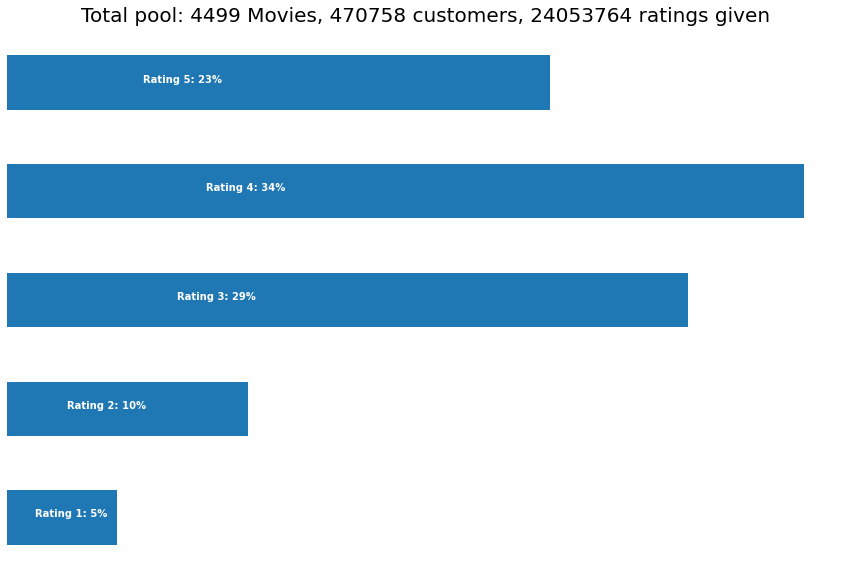

In [10]:
#Plot the distribution of the ratings in as a bar plot
ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title(f'Total pool: {movie_count} Movies, {cust_count} customers, {rating_count} ratings given', fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

## Data Preprocessing

In [11]:
#Count all the 'nan' values in the Ratings column in the 'ratings' dataset
df_nan = pd.DataFrame(pd.isnull(dataset.Rating), )

df_nan.head()

,Rating
0,True
1,False
2,False
3,False
4,False


In [12]:
#Store the index of all the rows containing 'nan' values (number of movies)
df_nan = df_nan[df_nan['Rating'] == True]

df_nan.shape

(4499, 1)

In [13]:
#Reset the index of the dataframe
df_nan = df_nan.reset_index()

df_nan.head()

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True


In [14]:
#Create a numpy array containing movie ids according the 'ratings' dataset
movie_np = []
movie_id = 1

for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    # numpy approach
    temp = np.full((1,i-j-1), movie_id)
    movie_np = np.append(movie_np, temp)
    movie_id += 1

# Account for last record and corresponding length
# numpy approach
last_record = np.full((1,len(dataset) - df_nan.iloc[-1, 0] - 1),movie_id)
movie_np = np.append(movie_np, last_record)

print(f'Movie numpy: {movie_np}')
print(f'Length: {len(movie_np)}')

Movie numpy: [1.000e+00 1.000e+00 1.000e+00 ... 4.499e+03 4.499e+03 4.499e+03]
Length: 24053764


In [15]:
x =zip(df_nan['index'][1:],df_nan['index'][:-1])

In [16]:
temp = np.full((1,547), 1)

In [17]:
print(temp)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

In [18]:
#Append the above created array to the datset after removing the 'nan' rows
dataset = dataset[pd.notnull(dataset['Rating'])]

dataset['Movie_Id'] = movie_np.astype(int)
dataset['Cust_Id'] =dataset['Cust_Id'].astype(int)
print('-Dataset examples-')
dataset.head()

-Dataset examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [19]:
dataset.shape

(24053764, 3)

## Data Cleaning

In [20]:
f = ['count','mean']

In [21]:
dataset_movie_summary = dataset.groupby('Movie_Id')['Rating'].agg(f)

dataset_movie_summary.index = dataset_movie_summary.index.map(int)

In [22]:
#Create a list of all the inactive users(users who rate less often)
dataset_cust_summary = dataset.groupby('Cust_Id')['Rating'].agg(f)
dataset_cust_summary.index = dataset_cust_summary.index.map(int)
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.7),0)
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index

print(f'Customer minimum times of review: {cust_benchmark}')

Customer minimum times of review: 52.0


In [23]:
print(f'Original Shape: {dataset.shape}')


Original Shape: (24053764, 3)


In [24]:
dataset = dataset[~dataset['Cust_Id'].isin(drop_cust_list)]
print('After Trim Shape: {}'.format(dataset.shape))

After Trim Shape: (18454563, 3)


In [25]:
print('-Data Examples-')
dataset.head()

-Data Examples-


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1


### Create ratings utility matrix

In [26]:
df_p = pd.pivot_table(dataset,values='Rating',index='Cust_Id',columns='Movie_Id')

print(df_p.shape)

(143458, 4499)


In [27]:
df_p.head()

Movie_Id,1,2,3,4,5,6,7,8,9,10,...,4490,4491,4492,4493,4494,4495,4496,4497,4498,4499
Cust_Id,,,,,,,,,,,,,,,,,,,,,
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df_title = pd.read_csv('/kaggle/input/netflix-prize-data/movie_titles.csv', encoding = "ISO-8859-1", header = None, names = ['Movie_Id', 'Year', 'Name'])

df_title.set_index('Movie_Id', inplace = True)

print (df_title.head(10))

            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW
6         1997.0                          Sick
7         1992.0                         8 Man
8         2004.0    What the #$*! Do We Know!?
9         1991.0      Class of Nuke 'Em High 2
10        2001.0                       Fighter


### Install the scikit-surprise library and importing relevant libraries

In [29]:
!pip install scikit-surprise

In [30]:
# Import required libraries
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

## Cross-Validation

In [31]:
# Load Reader library
reader = Reader()

# get just top 100K rows for faster run time
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Use the SVD algorithm.
svd = SVD(n_epochs=100)

# Compute the RMSE of the SVD algorithm
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0075  1.0062  1.0053  1.0064  1.0083  1.0067  0.0010  
MAE (testset)     0.8080  0.8083  0.8058  0.8091  0.8032  0.8069  0.0021  
Fit time          29.38   29.42   29.23   29.49   29.59   29.42   0.12    
Test time         0.29    0.29    0.14    0.14    0.15    0.20    0.07    


{'test_rmse': array([1.00747399, 1.0062296 , 1.00529602, 1.00643272, 1.00826923]),
 'test_mae': array([0.8079656 , 0.80829689, 0.80583456, 0.80911891, 0.8031776 ]),
 'fit_time': (29.380653142929077,
  29.419827222824097,
  29.22925066947937,
  29.493579864501953,
  29.59183645248413),
 'test_time': (0.2913987636566162,
  0.2906019687652588,
  0.14340472221374512,
  0.14432668685913086,
  0.14661026000976562)}

In [32]:
dataset.head()

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
6,893988,3.0,1


## Training the model and computing the accuracy

In [33]:
# getting full dataset
data = Dataset.load_from_df(dataset[['Cust_Id', 'Movie_Id', 'Rating']], reader)

# Split data to train and test
trainset, testset = train_test_split(data, test_size=.25)

# Now train the algorithm on the trainset
svd.fit(trainset)

# And predict ratings for the testset
predictions = svd.test(testset)

# Then compute RMSE and MAE
accuracy.rmse(predictions)
accuracy.mae(predictions)

RMSE: 0.9053
MAE:  0.6983


0.6983041368616493

## Demo: userId = 712664

In [36]:
#Find all the movies rated as 5 stars by user with userId = 712664
dataset_712664 = dataset[(dataset['Cust_Id'] == 712664) & (dataset['Rating'] == 5)]
dataset_712664 = dataset_712664.set_index('Movie_Id')
dataset_712664 = dataset_712664.join(df_title)['Name']
dataset_712664.head(10)

Movie_Id
3                              Character
79                           The Killing
175                       Reservoir Dogs
199                      The Deer Hunter
241                   North by Northwest
256    Ghost Dog: The Way of the Samurai
261                        The Big Clock
348        The Last Temptation of Christ
357                House of Sand and Fog
416                             Elephant
Name: Name, dtype: object

## Predict movies with high ratings for user with userId = 712664

In [37]:
# Create a shallow copy for the movies dataset
user_712664 = df_title.copy()

user_712664 = user_712664.reset_index()

#Predict the ratings for user_712664
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: svd.predict(712664, x).est)

#Drop extra columns from the user_712664 data frame
user_712664 = user_712664.drop('Movie_Id', axis = 1)

# Sort predicted ratings for user_712664 in descending order
user_712664 = user_712664.sort_values('Estimate_Score', ascending=False)

#Print top 10 recommendations
print(user_712664.head(10))

        Year                                  Name  Estimate_Score
900   1950.0             Diary of a Country Priest             5.0
2455  1964.0                  A Fistful of Dollars             5.0
240   1959.0                    North by Northwest             5.0
2504  1962.0                   Birdman of Alcatraz             5.0
995   1961.0                               Yojimbo             5.0
1369  1976.0                          Marathon Man             5.0
1688  2003.0                    Concert for George             5.0
2377  1957.0                             Aparajito             5.0
2266  1995.0  American Gothic: The Complete Series             5.0
1031  1992.0                           Hard Boiled             5.0
